{{ badge }}

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

In [0]:
price_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Works/Luggage bags/Data_miniproject.csv')

In [0]:
price_data.head()

,Cost,Weight,Weight1,Length,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340


* **Adding extra features**

In [0]:
price_data['Extra_Wt'] = price_data[['Weight','Weight1']].apply(lambda x: x[1]-x[0], axis=1)
price_data['Volume'] = price_data[['Length','Height','Width']].apply(lambda x:round(x[0]*x[1]*x[2],4), axis=1)

* **Making Cost as last output columns**

In [0]:
y = price_data['Cost']
price_data.drop(labels=['Cost'], axis=1, inplace=True)
price_data['Cost'] = y

In [0]:
price_data.head()

,Weight,Weight1,Length,Height,Width,Extra_Wt,Volume,Cost
0,23.2,25.4,30.0,11.5200,4.0200,2.2,1389.3120,242.0
1,24.0,26.3,31.2,12.4800,4.3056,2.3,1676.4973,290.0
2,23.9,26.5,31.1,12.3778,4.6961,2.6,1807.7617,340.0
3,26.3,29.0,33.5,12.7300,4.4555,2.7,1900.0703,363.0
4,26.5,29.0,34.0,12.4440,5.1340,2.5,2172.1749,430.0


* Column 'Extra_Wt' shows the extra weight that bag can carry after it is expanded from normal state.
* 'Volume' column states the volume of each bag

In [0]:
price_data.shape

(159, 8)

In [0]:
price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Weight    159 non-null    float64
 1   Weight1   159 non-null    float64
 2   Length    159 non-null    float64
 3   Height    159 non-null    float64
 4   Width     159 non-null    float64
 5   Extra_Wt  159 non-null    float64
 6   Volume    159 non-null    float64
 7   Cost      159 non-null    float64
dtypes: float64(8)
memory usage: 10.1 KB


* We can see from dataframe information that no column is having 'NaN' or None vaules.
* All the columns are in same datatype 'float'

Things to calculate
* No. of features
* Missing values
* Duplicate rows
* For each variable min, max, mean of values
* Pair plots of each variable against each.
* Correlations of each variable against each. (pearson's, spearman)
* Feature importance score against output variable

* **Checking if there are any null values**

In [0]:
price_data.isna().sum()

Weight      0
Weight1     0
Length      0
Height      0
Width       0
Extra_Wt    0
Volume      0
Cost        0
dtype: int64

* There are no null/Nan values in any of the columns

* **Cleaning the data**

* When checked if the cost of all the given bags is having >0 and found below column which shows zero which is invalid.
* So, we are going to remove it as it may affect our analysis or prediction.

In [0]:
price_data[price_data['Cost']==0.0000]

,Weight,Weight1,Length,Height,Width,Extra_Wt,Volume,Cost
40,19.0,20.5,22.8,6.4752,3.3516,1.5,494.812,0.0


In [0]:
#dropping the row having index number '40'
price_data.drop(labels=[40],axis=0,inplace=True)

* **Checking for duplicates**

In [0]:
price_data[price_data.duplicated()]

,Weight,Weight1,Length,Height,Width,Extra_Wt,Volume,Cost


* There are no duplicate values from the dataset

* **Finding min, max, mean values of each column**

In [0]:
price_data.apply(lambda x: round(np.mean(x),4), axis =0)

Weight        26.2930
Weight1       28.4658
Length        31.2804
Height         8.9868
Width          4.4242
Extra_Wt       2.1728
Volume      1712.1792
Cost         400.8475
dtype: float64

* The Average extra weight a given bag can carry is around 2 and average cost is 400

* **Min**

In [0]:
price_data.apply(lambda x: round(np.min(x),4), axis =0)

Weight       7.5000
Weight1      8.4000
Length       8.8000
Height       1.7284
Width        1.0476
Extra_Wt     0.5000
Volume      19.6729
Cost         5.9000
dtype: float64

* Minimum cost of cost of a bag is around 6.

* **Max**

In [0]:
price_data.apply(lambda x: round(np.max(x),4), axis =0)

Weight        59.0000
Weight1       63.4000
Length        68.0000
Height        18.9570
Width          8.1420
Extra_Wt       4.4000
Volume      5771.4033
Cost        1650.0000
dtype: float64

* Maximum cost of a bag is 1650.

## Plotting pair of features

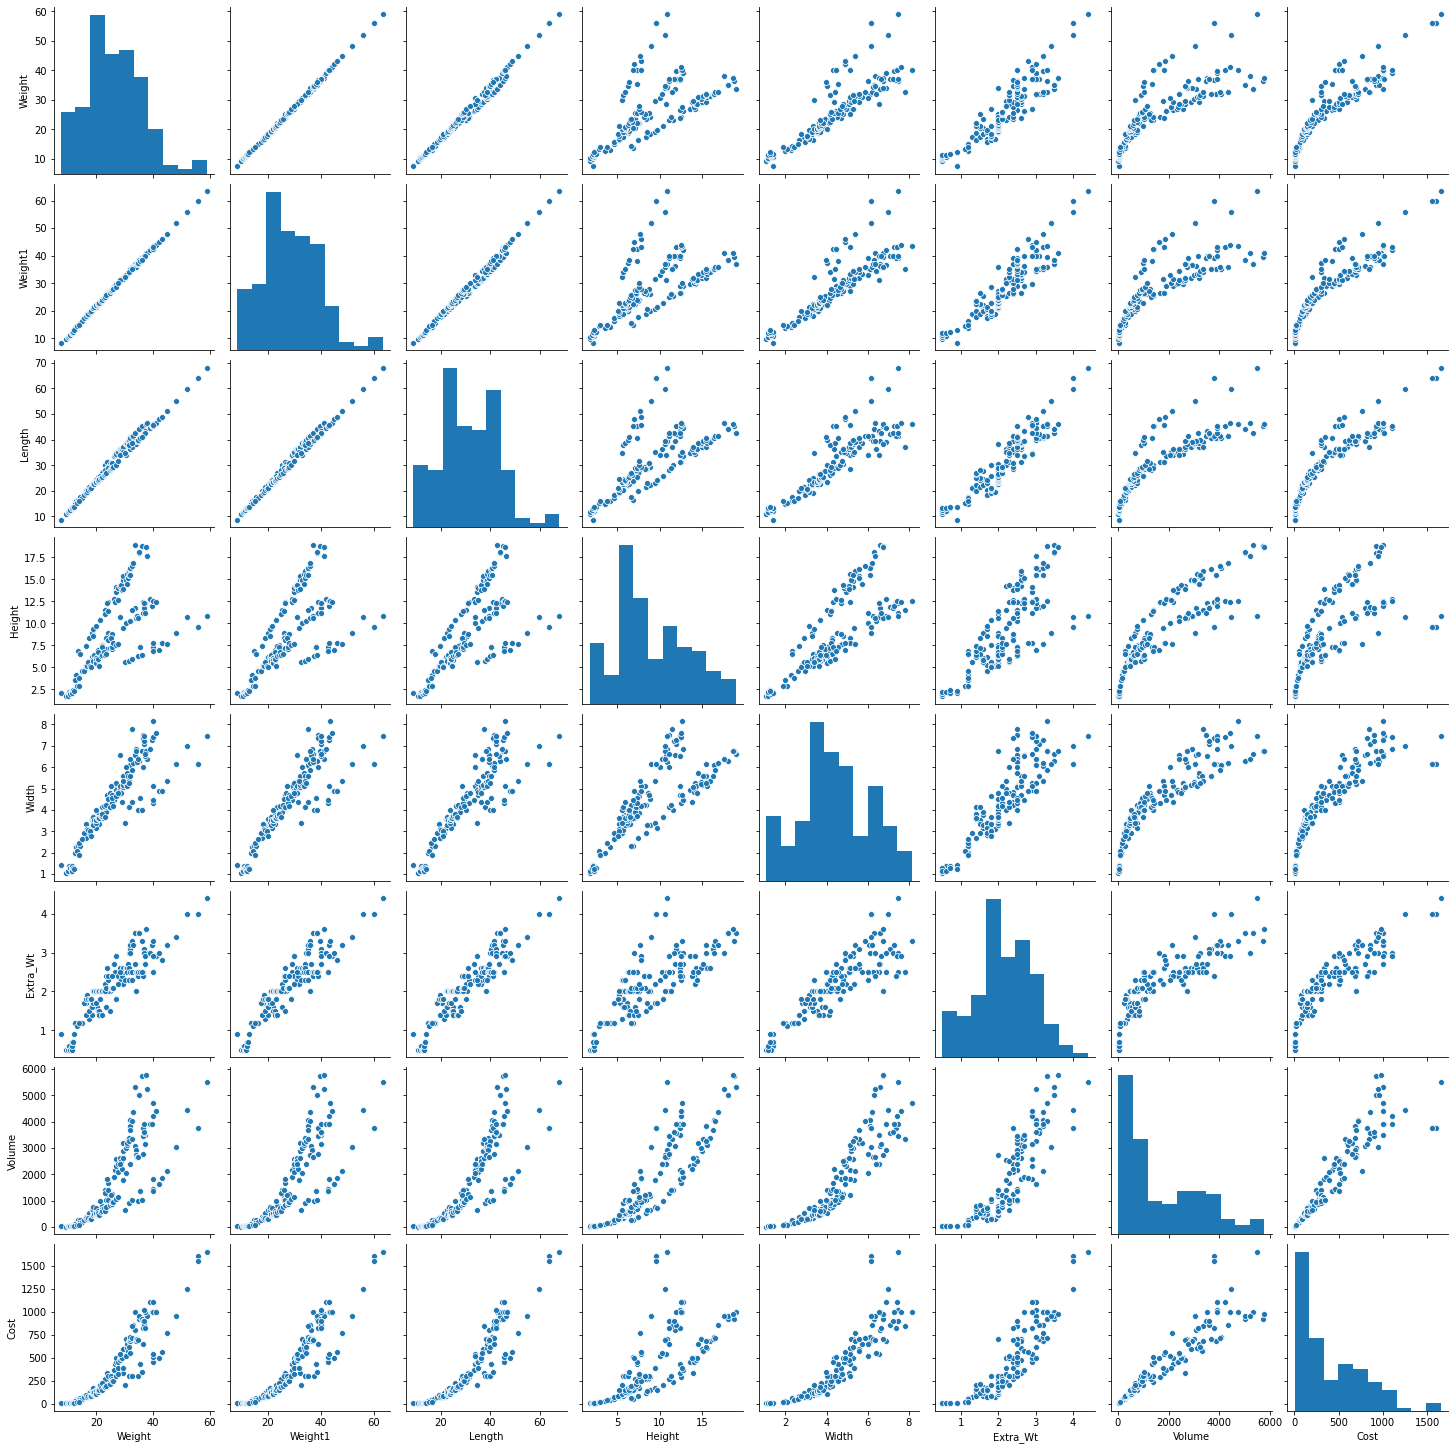

In [0]:
sns.pairplot(data=price_data)
plt.show()

**Intuitions**

* **Weight1 Vs. Weight** are in perfect linear relationship.
* **Length Vs. Weight** and **Length Vs. Weight1** are linear with few deviations.
* **Volume and Cost** are in distributed linear relation as volume increases cost of a bag also increases.
* **Width Vs Cost** : Upto certain width (pt-3) cost is negligibly increasing where after this point cost of bags is increasing almost linearly.
* **Length Vs Cost** : Same is the case with this. Upto length 20, cost is not increasing, after this point, linear.
* **Height Vs Cost** : Upto height 5 cost is same, where as after 5 cost of bag is increasing by groups which means some other factors are affecting the cost along with Height.

##Correlations

* **Pearson's Correlation of variables**
	
Pearson's correlation coefficient = covariance(X, Y) / (stdv(X) * stdv(Y))

In [0]:
price_dt_pr = price_data.corr(method='pearson')

In [0]:
price_dt_pr

,Weight,Weight1,Length,Height,Width,Extra_Wt,Volume,Cost
Weight,1.000000,0.999516,0.992004,0.624409,0.866684,0.906149,0.808396,0.915719
Weight1,0.999516,1.000000,0.994083,0.639503,0.873201,0.918865,0.817051,0.918603
Length,0.992004,0.994083,1.000000,0.702655,0.878189,0.933699,0.847704,0.923090
Height,0.624409,0.639503,0.702655,1.000000,0.792401,0.775186,0.881795,0.723857
Width,0.866684,0.873201,0.878189,0.792401,1.000000,0.879669,0.890620,0.886654
Extra_Wt,0.906149,0.918865,0.933699,0.775186,0.879669,1.000000,0.855545,0.875018
Volume,0.808396,0.817051,0.847704,0.881795,0.890620,0.855545,1.000000,0.932281
Cost,0.915719,0.918603,0.923090,0.723857,0.886654,0.875018,0.932281,1.000000


* In the diagonal, we have corr of features themselves, which is why '1'.

* **Heat Map**

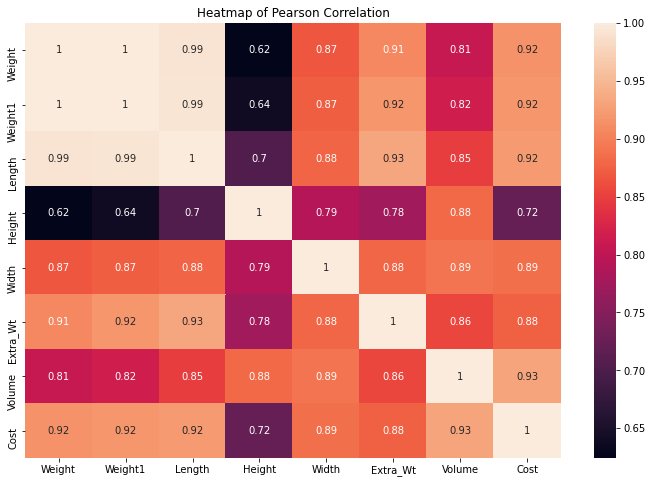

In [0]:
fig,ax = plt.subplots(figsize=(12,8))
sns.heatmap(data=price_dt_pr,annot=True)
plt.title('Heatmap of Pearson Correlation')
plt.show()

* **Spearman Correlation**

Spearman's correlation coefficient = covariance(rank(X), rank(Y)) / (stdv(rank(X)) * stdv(rank(Y)))

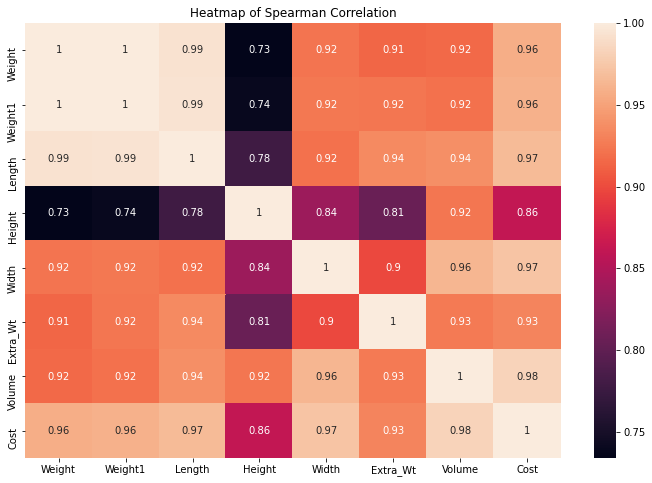

In [0]:
price_dt_sp = price_data.corr(method='spearman')

fig,ax = plt.subplots(figsize=(12,8))
sns.heatmap(data=price_dt_sp,annot=True)
plt.title('Heatmap of Spearman Correlation')
plt.show()

In [0]:
#Saving the features
price_data.to_parquet('/content/drive/My Drive/Colab Notebooks/Works/Luggage bags/price_ft.parquet.gzip',compression='gzip')